## Author : Gaurav Khandave
## Date : 10/10/2016
## Version : 1.0.0

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading the data from the disk into memory
data = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

In [3]:
cols = [14,15,16,17,18,19]
data.drop(data.columns[cols],axis=1,inplace=True)

In [4]:
data

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster


In [5]:
data.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?'],
      dtype='object')

In [6]:
data.shape

(32754, 14)

In [7]:
data.columns = ['Id','Gender','AgeGroup','MaritialStatus','EmpStatus','InMilitaryService','HasKids','Education','Country','State','HouseholdIncome','SubReddit','DogOrCat','Cheese']

In [8]:
#Gender classification
data.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

In [9]:
#Age classification
data.AgeGroup.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: AgeGroup, dtype: int64

In [10]:
#Employment status classification
data.EmpStatus.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: EmpStatus, dtype: int64

In [11]:
#Maritial status classification
data.MaritialStatus.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: MaritialStatus, dtype: int64

In [12]:
data.MaritialStatus.replace('Blank','Single',inplace=True)

In [13]:
data[data.MaritialStatus=='Married/civil union/domestic partnership'].AgeGroup.value_counts()

25-34          3296
35-44          1344
18-24           431
45-54           306
55-64            88
65 or Above      16
Under 18          6
None              3
Name: AgeGroup, dtype: int64

In [14]:
data[data.AgeGroup.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,State,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [15]:
dataDict = data.to_dict()

In [16]:
#Drop US states
data.drop(data.columns[9],axis=1,inplace=True)

### Assigining Continents to countries

In [17]:
Asia=['Bangladesh','Bhutan','Iran','Maldives','Nepal','Pakistan','Sri Lanka','Brunei Darussalam','Cambodia','Indonesia',
      'Thailand',"Lao People's Democratic Republic",'Malaysia','Myanmar','Philippines','Singapore',
      'Timor-Leste','Viet Nam','China','Macao',"Democratic People's Republic of Korea",'Mongolia',
      'Republic of Korea','Kazakhstan','Kyrgyzstan','Tajikistan','Turkmenistan','Uzbekistan',
      'Russia','Palestine', 'Taiwan','India','thailand','Korea, South','Japan','Hong','Brunei',
      'Russian Federation','United Arab Emarites','South Korea','SINGAPORE!','singapore','Hong Kong',
      'Vietnam','Kingdom of Saudi Arabia','SV','Hong Kong ','Brunei Darussalem','Kuwait ''Iran','Armenia','Azerbaijan','Bahrain',
      'Cyprus','Georgia','Iraq','Israel','Jordan','INDIA','india','North Korea','kuwait','Hong Kong, China','Republic Of Korea (American Citizen)','Singapore ',"People's Republic of China",
      'South Korea ','philippines','china','malaysia','Hong KOng','Hong Kong Special Administrative Region, China', 'ISRAEL',
      'PHIILIPPINES','TURKEY','israel', 'Lebanon ','Republic of Macedonia','Iraq, Kurdistan','india','MALAYSIA','Indiia',
      'israel', 'Lebanon ','Japan ','lebanon','turkey','taiwan','JAPAN','SIngapore',"People's Republic of China",'japan',
      'Kuwait','Lebanon','Occupied Palestinian Territory','Oman','Qatar','Saudi Arabia','Syrian Arab Republic','Turkey','United Arab Emirates','Yemen','Afghanistan']
Europe=['spain', 'germany','new zealand','Equestria','England, United Kingdom','Germany ','Republic of Moldova','the netherland',          'United Kingdom of Great Britain & Northern Ireland','Frabce','Swden','Moldova',
        'United Kingdom of Great Britain and Northern Ireland','Republic of Poland', 'Honduras','ENGLAND', 'GErmany', 'greece',  
        'Ger','finland','iceland','belgium', 'Sweden ','Republic Of Ireland','England ','Great Britain','New zealand', 'New Zealand ',
        'The United Kingdom of Great Britain and Northern Ireland','Albania','Grand Duchy of Baden','United Kingdown','Faroe Islands',
        'Portugal','Untied Kingdom ', 'The Czech Republic','Montenegro','Antigua and Barbuda','United Kindom',' United Kingdom',
        'The Republic of Ireland', 'Australia ','Andorra','czech republic','Untied Kingdom','St.Vincent', 'Ireland ',
        'united kingdom of great Britain ','UNITED KINGDOM','united kingdom ','Unted Kingdom','New Zealanad','United Knigdom', 
        'Finland ', 'netherlands','The Netherlands ','Bosnia and Herzegowina','united kingdom, Spain ',
        'ITALY','croatia','Belarus','United Kingdom, India','Portugal ',
        'Ireland','United Kingdom ','Malta','france','United kingdom,England, United Kingdom','United kingdom',  'Commonwealth of the Northern Mariana Islands','Helsinki','U.K lol', 'scotland',
        'UK','U.K.','estonia','Frande','poland', 'U.K. Problem?',
        'Lithuania/United Kingdom','Kosova','Kosovo','Denmark','United Kingdom','Belgium','Italy','italy','Romania',
        'Germany', 'France', 'Greece', 'Switzerland','Netherlands', 'Bulgaria', 'Spain', 'Poland', 'Finland',
        'the Netherlands','Slovenia','Iceland','Bosnia and Herzegovina','Croatia','united kingdom','United kingom','Belgrium', 'slovenia','united kingdom / scotland', 'London United Kingdom',
        'United Kingdom of Great Britain','uk','Czech republic', 'u.k', 'United  Kingdom', 
        'United kingdom ','Croatua','switzerland','ITALY IT','england','England','SPAIN','Itaky',
        'Scotland and Sweden','NORWAY', 'DENMARK','U.K','United ',
        'United kingdom of great britain and northern Ireland','Unitd Kingdom',
        'british virgin islands','BG','Denmark ','Serbia','serbia','UNited Kingdom','Galiza','The Netherlands','Netherlands, the',
        'United Kingdo,','Great Britian ','the Netherlands (a.k.a. Holland)',
        'Slovak Republic','Norway.','Australia and United Kingdom','IRELAND','England (United Kingdom is not a country)',
        'Republic of Ireland','Republic of Ireland ','BELGIUM','Peoples Republic of South Yorkshire',
        'United Kingdon', 'wales','norway', 'Swedeb','Netehrlands','Kingdom of Norway',
        'Bosnia And Herzegovina','Catalonia','new Zealand ','Newzealand ', 'FUNLAND','Belgrium','slovenia',
        'Holland','Federal Republic of Germany','United Kingdom (England)', 'United KIngdom',
        'England','Scotland','FRANCE','romania','Northern Ireland','sweden','Sweden',
        'Federal Republic of Germany','The NEtherlands','denmark','FUNLAND','Belgrium','Nether',
        'New Zealand','Estonia','Puerto Rico','Portugal','Slovakia','Ukraine', 'Macedonia','Czech Republic',
        'Lithuania','United Kingdom (Scotland)','Swiss','Bermuda','Dominica','United Jingdom', 'Gibraltar', 'ireland',
        'Hungary','Uninted Kingdom','Isle of Man','Luxembourg','Swedem','Wales', 'Latvia', 'POLAND']
Australia=['Austrailia','Ozstralia','Australia','australia','austria','Australia','australia','Australi',
           'Austraila','AUSTRALIA','Austrailia','Ozstralia','Australi','Australia','Austria', 'australia','austria',
           'AUSTRALIA', 'Austrailia', 'Austraila','Ozstralia','Australi', 'Fiji','Papua New Guinea', 'New Zealand','new zealand', 'Solomon Islands',
           'Vanuatu', 'Samoa', 'vanuatu', 'samoa', 'Kiribati', 'kiribati' , 'Tonga','tonga', 'Palau','palau', 'Federated States of Micronesia', 'Marshall Islands', 
           'marshall islands','Tuvalu','tuvalu','Nauru', 'nauru'] 
Africa=['Algeria','Egypt','Libyan Arab Jamahiriya','Equatorial Guinea','Gabon','Sao Tome and Principe','Botswana','Lesotho','Namibia','South Africa','Swaziland',
        'kenya','Morocco','Tunisia','Western Sahara','Burundi','Comoros','Djibouti','Eritrea','Ethiopia','Kenya','Madagascar','Malawi','Mauritius','Mayotte','Zimbabwe',
        'Mozambique','Réunion','Rwanda','Somalia','Sudan','Uganda','United Republic of Tanzania','Zambia',
        'Angola','Cameroon','Central African Republic','Chad','Congo','Democratic Republic of the Congo','Niger','Nigeria','Senegal',
        'Sierra Leone','Togo','Jamaica', 'Dominican Republic','south africa','Aruba','Tanzania',
        'Benin','Burkina Faso','Cape Verde',"Côte d'Ivoire",'Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali','Mauritania']
SouthAmerica=['Brasil','Brasl','brazil','chile','Chile','Uruguay ','venezuela','Argentina','Bolivia','colombia','Venezuela','ecuador','Brazilf',
              'Brazil','Colombia','Ecuador','French Guiana','Guyana','Suriname','argentina','Uruguay','Paraguay','Peru']

Antarctica=['Antarctica','antarctica']

NorthAmerica=['United States','United states of America', 'United States of ','canada','Trinidad and TObago','Commonwealth of the Northern Mariana Islands',
              'Republic of the Marshall Islands','united states of America ','Amurika',
              'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
              'Belgium/Canada','america','haiti','United Strate','Canada, Eh','United s',
              'The Dominion of Canada','United States (Guam)','Ontario, Canada','united states (my state is APO) ',
              'Mx','Mexico','mexico','Canada, Bitches.','United States of America (Washington, DC)',
              "United States (apparently I can't put D.C. as my state)",'united states', 'united states :f',
              'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
              'United States, District of Columbia','U S A','USVI','america','united Sr','Idaho'
              'Canada (currently Korea)','Canada','CANADA','Norway',
              'United states of America. ','Costa Rica','M\xc3\xa9xico','Barbados','Canada, eh?',
              'United States of America (DC)','Trinidad & Tobago',
              'Belize','Dominion of Canada', 'Toronto','El Salvador','Canadia','Trinidad and Tobago',
              'Sint Maarten','united sates','The United States of America','Usa', 'United st','Mexico ',
              'united States','Unnited States','Bahamas',' Canada','canada ', 'United States of America ', 
              'United States Of America', 'Guam', 'usa','greenland','Camada','U.S.A.','Canda','Unites States','Panama',
              'Cayman Islands','Amerikka', 'Guatemala','United States ', 'US','united stateds','Amerikka', 'Guatemala','MEXICO',
              'United States of America: Guam. No option for territories :(','United states',
              'United Sates','Canada ','united states of america','United States of America', 'Cananda',
              'United States of American','United States (Washington, DC)','united states of American', 
              'Nicaragua','MEXICO','USA',' Canada eh', 'United States of America: Guam']

SouthAmerica=['Brasil','Brasl','brazil','chile','Chile','Uruguay ','venezuela','Argentina','Bolivia','colombia','Venezuela','ecuador','Brazilf',
              'Brazil','Colombia','Ecuador','French Guiana','Guyana','Suriname','argentina','Uruguay','Paraguay','Peru']


       




In [18]:
Continent = []
dump=[]
# For each row in the column,
for i in data['Country']:
    x=''
    try:
        x=transformations.cn_to_ctn(i)
        Continent.append[x]
    except:
        if(i in Europe):
            x="Europe"
            Continent.append(x)
        elif(i in NorthAmerica):
            x="North America"
            Continent.append(x)
        elif(i in SouthAmerica):
            x="South America"
            Continent.append(x)
        elif(i in Africa): 
            x="Africa"
            Continent.append(x)
        elif(i in Asia):
            x="Asia"
            Continent.append(x)

        elif(i in Antarctica):
            x="Antarctica"
            Continent.append(x)
        elif(i in Australia):
            x="Australia"
            Continent.append(x)
        else:
            x="None"
            Continent.append(x) 
            dump.append(i)

In [19]:
data['Continent'] = Continent

In [20]:
data.Continent.value_counts()

North America    24582
Europe            5495
Australia         1145
Asia               894
South America      281
None               220
Africa             135
Antarctica           2
Name: Continent, dtype: int64

In [21]:
#Replace None value with Male
data.Gender.replace('None','Male',inplace=True)

In [22]:
data.Gender.value_counts()

Male      26619
Female     6135
Name: Gender, dtype: int64

In [23]:
#Replace None in EmpStatus by Not employed, but looking for work
data.EmpStatus.replace('None','Not employed, but looking for work',inplace=True)

In [24]:
data.EmpStatus.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2238
Freelance                                 1948
Not employed and not looking for work      682
Retired                                     85
Name: EmpStatus, dtype: int64

In [25]:
#Replace None value with 25-34
data.AgeGroup.replace('None','25-34',inplace=True)

In [26]:
data.HasKids.value_counts()

No      27488
Yes      5047
None      219
Name: HasKids, dtype: int64

In [27]:
data.HasKids.replace('None','No',inplace=True)

In [28]:
data[data.Education.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [29]:
data[data.EmpStatus.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [30]:
data[data.AgeGroup.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [31]:
data[data.MaritialStatus.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [32]:
data[data.InMilitaryService.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [33]:
data[data.HasKids.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [34]:
data[data.Country.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [35]:
data[data.HouseholdIncome.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [36]:
data[data.SubReddit.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",NaN,I like cats.,Munster,Europe
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,"Under $20,000",NaN,I like cats.,Swiss,Europe
29,30,Female,18-24,Forever Alone,Student,No,No,Some college,United States,none,NaN,I like dogs.,American,North America
52,53,Male,25-34,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",NaN,I like cats.,Provolone,North America
61,62,Male,25-34,Single,Employed full time,Yes,No,Some college,romania,"$20,000 - $29,999",NaN,I like cats.,Other,Europe
75,76,Male,35-44,Single,Freelance,No,No,Some college,United Kingdom,"$70,000 - $99,999",NaN,I like cats.,Other,Europe
79,80,Male,25-34,Single,Employed full time,No,No,Bachelor's degree,United States,"$40,000 - $49,999",NaN,I like cats.,Brie,North America
89,90,Male,18-24,Single,Student,No,No,Some college,United States,"$150,000 or more",NaN,I like cats.,Brie,North America
103,104,Male,25-34,In a relationship,Student,No,No,Bachelor's degree,United States,"$20,000 - $29,999",NaN,I like dogs.,Goat,North America
162,163,Female,25-34,Single,Student,No,No,Bachelor's degree,United States,"Under $20,000",NaN,I like turtles.,Goat,North America


In [37]:
data.SubReddit.replace(NaN,'Missing',inplace=True)

In [38]:
data[data.SubReddit.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [39]:
data[data.DogOrCat.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent
2705,2706,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,none,DROP TABLE `users`,NaN,1,Europe
30331,30334,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,Canada,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming'),North America


In [40]:
data.DogOrCat.replace(NaN,'Dog',inplace=True)

In [41]:
data[data.DogOrCat.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [42]:
data[data.Cheese.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese,Continent


In [43]:
X = pd.DataFrame()
#X['Gender'] = data ['Gender']

X['AgeGroup'] = data['AgeGroup']
X['EmpStatus'] = data['EmpStatus']
X['HasKids'] = data['HasKids']
data.MaritialStatus.replace('Widowed','Single',inplace=True)
data.MaritialStatus.replace('Forever Alone','Single',inplace=True)
data.MaritialStatus.replace('Married/civil union/domestic partnership','Married',inplace=True)
data.MaritialStatus.replace('Engaged','In a relationship',inplace=True)
y = data.pop("MaritialStatus")
y = pd.get_dummies(y)

In [44]:
y

,In a relationship,Married,Single
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [45]:
categorical_variables = ['AgeGroup', 'EmpStatus','HasKids']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

#X.drop(['AgeGroup_25-34','AgeGroup_35-44','AgeGroup_45-54','AgeGroup_55-64','AgeGroup_65 or Above'], axis=1, inplace=True)

In [46]:
X

,AgeGroup_18-24,AgeGroup_25-34,AgeGroup_35-44,AgeGroup_45-54,AgeGroup_55-64,AgeGroup_65 or Above,AgeGroup_Under 18,EmpStatus_Employed full time,EmpStatus_Freelance,EmpStatus_Not employed and not looking for work,"EmpStatus_Not employed, but looking for work",EmpStatus_Retired,EmpStatus_Student,HasKids_No,HasKids_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


30 trees
C-stat:  0.72715838503

50 trees
C-stat:  0.726021368769

100 trees
C-stat:  0.723479992162

200 trees
C-stat:  0.720923068952

500 trees
C-stat:  0.715164555615

1000 trees
C-stat:  0.709614794043

2000 trees
C-stat:  0.702583975383



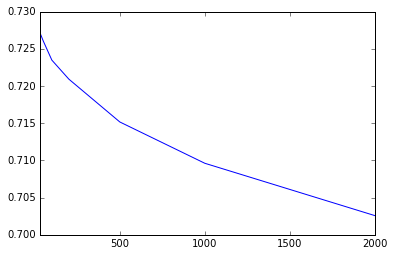

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]
results=[]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

In [48]:
model.feature_importances_

array([ 0.29628844,  0.03966928,  0.00406377,  0.00226239,  0.00309861,
        0.00325423,  0.32826659,  0.04053646,  0.00496625,  0.01039457,
        0.0095957 ,  0.0021729 ,  0.00842874,  0.12529183,  0.12171025])

auto option
C-stat:  0.72715838503

None option
C-stat:  0.72715838503

sqrt option
C-stat:  0.727132241594

log2 option
C-stat:  0.727132241594

0.9 option
C-stat:  0.727199923702

0.2 option
C-stat:  0.727132241594



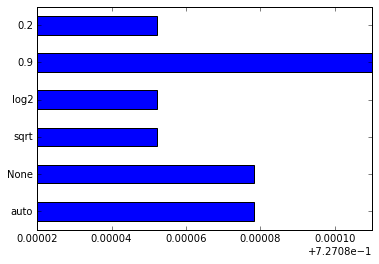

In [49]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=30, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.72710,.72719));

1 min samples
C-stat:  0.727199923702

2 min samples
C-stat:  0.72730769998

3 min samples
C-stat:  0.727455376102

4 min samples
C-stat:  0.72745415825

5 min samples
C-stat:  0.727527534066

6 min samples
C-stat:  0.727592137503

7 min samples
C-stat:  0.727589017471

8 min samples
C-stat:  0.727631925799

9 min samples
C-stat:  0.727609868394

10 min samples
C-stat:  0.72764356993

20 min samples
C-stat:  0.727819354571

50 min samples
C-stat:  0.727692376783



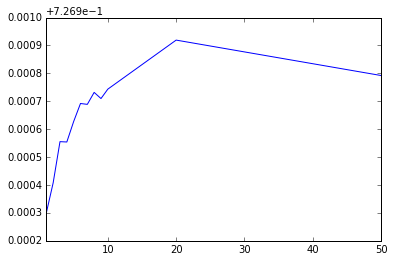

In [50]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20,50]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=30, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=0.9, 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

### Final ROC AUC score

In [51]:
model = RandomForestRegressor(n_estimators=30, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.9, 
                              min_samples_leaf=20)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.727819354571


In [52]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [53]:
X_train.shape

(19652, 15)

In [54]:
y.head()

,In a relationship,Married,Single
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


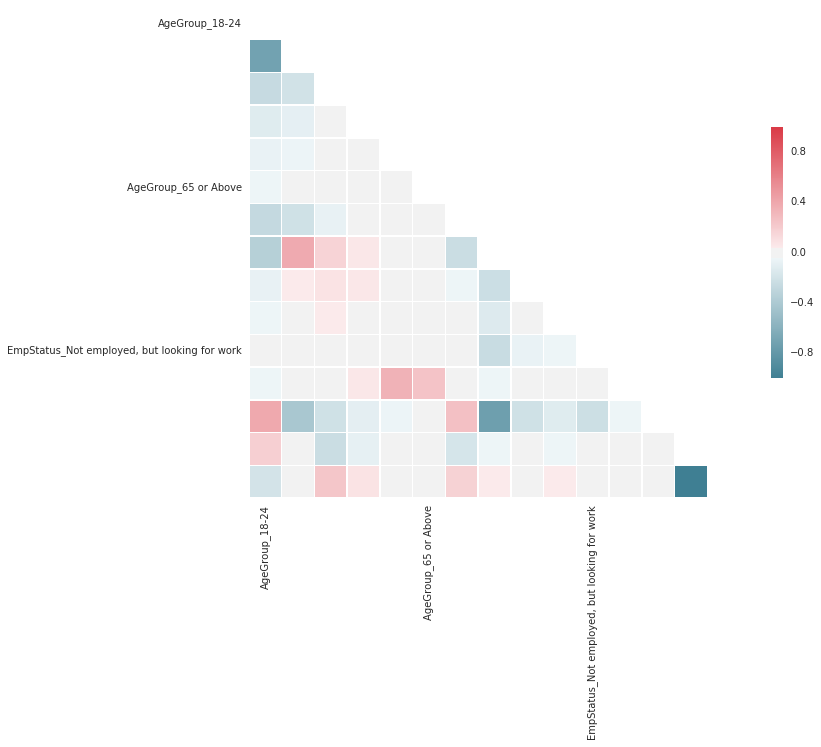

In [55]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)